# Can your predict the wine quality for a factory ? (for educational purpose only)

given [this dataset](https://www.kaggle.com/rajyellow46/wine-quality) we want to predict the class of the wine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df= pd.read_csv("../datasets/wine-quality/winequalityN.csv")

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


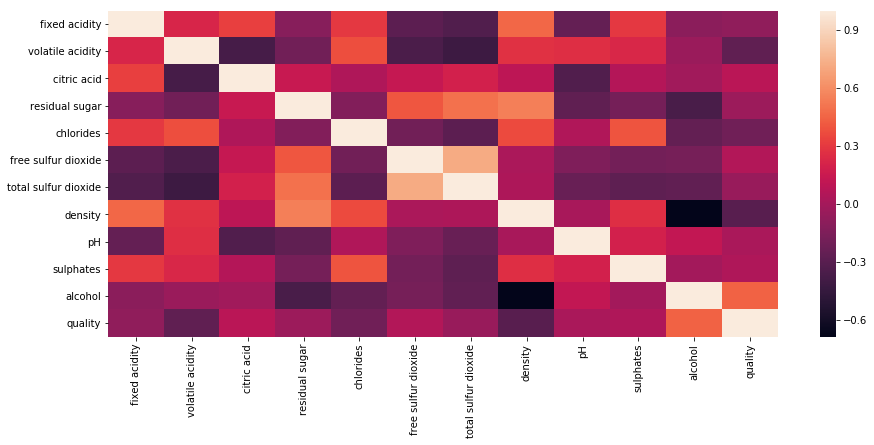

In [15]:
fig, ax =  plt.subplots(figsize=(15,6))
corr = df.corr()
sb.heatmap(corr, ax=ax)

# i- Data Preparing

In [34]:
df = df.dropna()
features = df.iloc[:, [3,6,9,10,11]].values
goal = df.iloc[:, -1].values
scaler = StandardScaler()
features = scaler.fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(features, goal, test_size=0.2, random_state=0)

---
---

# ii- The used Classifiers and their score values.

## KNN

In [35]:
maxscore = 0
maxK = 0

for K in [1, 3, 5, 10, 20, 100, 150, len(x_train)]:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    score = knn.score(x_test, y_test)
    if score > maxscore:
        maxscore=score
        maxK = K
    
print("The maximum score = {} given by the K = {}".format(maxscore, maxK))

The maximum score = 0.6078886310904872 given by the K = 1


---
---

## Linear SVM

In [36]:
svm = SVC(kernel ='linear', random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

   0  1    2    3  4  5
0  0  0    5    2  0  0
1  0  0   18   21  0  0
2  0  0  280  136  0  0
3  0  0  216  372  0  0
4  0  0   18  198  0  0
5  0  0    0   27  0  0
Accuracy :  0.504253673627


---
---

## Gaussian SVM

In [37]:
svm = SVC(kernel ='rbf', random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

   0  1    2    3   4  5
0  0  0    5    2   0  0
1  0  0   21   17   1  0
2  0  0  256  159   1  0
3  0  0  158  402  28  0
4  0  0    7  178  31  0
5  0  0    0   20   7  0
Accuracy :  0.53286929621


---
---

## Poly SVM

In [38]:
svm = SVC(kernel ='poly', random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

   0  1    2    3   4  5
0  0  0    5    2   0  0
1  0  0   10   29   0  0
2  1  0  142  273   0  0
3  0  0   91  488   9  0
4  0  0    8  195  13  0
5  0  0    0   22   5  0
Accuracy :  0.497293116783


---
---

## Logistic Regression

In [39]:
logistic = LogisticRegression(random_state = 0)
logistic.fit(x_train, y_train)
y_predict = logistic.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", logistic.score(x_test, y_test))

   0  1    2    3   4  5
0  0  0    5    2   0  0
1  0  0   16   23   0  0
2  0  0  254  161   1  0
3  0  0  187  385  16  0
4  0  0   17  187  12  0
5  0  0    0   24   3  0
Accuracy :  0.503480278422


---
---

## GaussianNB

In [40]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_predict = GNB.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", GNB.score(x_test, y_test))

   0  1    2    3   4  5
0  0  0    5    2   0  0
1  1  1   18   18   1  0
2  2  4  295  110   5  0
3  1  3  242  286  56  0
4  0  0   21  150  45  0
5  1  0    0   16  10  0
Accuracy :  0.484918793503


---
---

## DecisionTree

In [41]:
DecisionTree = DecisionTreeClassifier(random_state=0)
DecisionTree.fit(x_train, y_train)
y_predict = DecisionDecisionTree = DecisionTreeClassifier(random_state=0)
DecisionTree.fit(x_train, y_train)
y_predict = DecisionTree.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", DecisionTree.score(x_test, y_test))

   0   1    2    3    4   5  6
0  0   0    4    2    1   0  0
1  0   7   18   11    1   2  0
2  2   9  273  111   20   1  0
3  7  11  130  356   71  12  1
4  1   2   15   76  114   6  2
5  0   0    0   11    6  10  0
6  0   0    0    0    0   0  0
Accuracy :  0.587780355762


---
---

## Another LinearSVC

In [42]:
svm = LinearSVC(random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

   0  1    2    3  4  5
0  0  0    5    2  0  0
1  0  0   17   22  0  0
2  0  0  260  156  0  0
3  0  0  200  387  1  0
4  0  0   17  196  3  0
5  0  0    0   27  0  0
Accuracy :  0.502706883217


---
---